#Dia 5

###Realizando recortes nos dados, com o uso da ferramenta Boxplot, a fim de obter informações atualizadas e úteis. Os recortes visam entender melhor a distribuição dos dados ao longo dos anos.

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define estilo visual personalizado
def aplicar_estilo_personalizado():
    plt.style.use('default')
    plt.rcParams.update({
        'axes.facecolor': '#000000',        # fundo do gráfico
        'figure.facecolor': '#000000',      # fundo da figura
        'axes.edgecolor': '#999999',        # borda dos eixos
        'axes.labelcolor': '#CCCCCC',       # cor dos textos dos eixos
        'xtick.color': '#CCCCCC',
        'ytick.color': '#CCCCCC',
        'text.color': '#CCCCCC',            # cor do título
        'axes.titleweight': 'bold',
        'axes.titlesize': 16,
        'axes.titlecolor': '#CCCCCC',
        'grid.color': '#666666',            # cor da grade
        'grid.alpha': 0.3,
        'legend.facecolor': '#000000',
        'legend.edgecolor': '#CCCCCC',
    })

    sns.set_palette(['#FF2ECC'])  # rosa choque como cor base dos gráficos

# Aplicar estilo
aplicar_estilo_personalizado()

In [92]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral,mes_num,mes_nome
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas,1,Jan
1,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas,1,Jan
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010-01-04 08:08:44.081,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas,1,Jan
3,709687,L184117,2010/01/18 11:07:46.470000000,2010-01-04 08:24:21.284,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas,1,Jan
4,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas,1,Jan


###Alunos de graduação

In [93]:
alunos_graduacao = emprestimos_completo.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
alunos_graduacao.colecao.value_counts()

,count
colecao,
Acervo Circulante,1600182
Multimeios,4652
Monografias,3572
Dissertações,1152
Obras de Referência,1047
Publicações de Autores do RN,595
Publicações da UFRN,466
Teses,245
Folhetos,180


###Criando uma tabela com a quantidade mensal/ano

In [94]:
alunos_graduacao_acervo_circulante = alunos_graduacao.query('colecao == "Acervo Circulante"')
alunos_graduacao_acervo_circulante = pd.DataFrame(alunos_graduacao_acervo_circulante)
alunos_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_graduacao_acervo_circulante['data_emprestimo'])
alunos_graduacao_acervo_circulante['ano'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.year
alunos_graduacao_acervo_circulante['mes'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.month
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.loc[:,['ano','mes']]
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
alunos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2017,1,2671
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


from matplotlib import pyplot as plt
alunos_graduacao_acervo_circulante['ano'].plot(kind='hist', bins=20, title='ano')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
alunos_graduacao_acervo_circulante['mes'].plot(kind='hist', bins=20, title='mes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
alunos_graduacao_acervo_circulante['quantidade'].plot(kind='hist', bins=20, title='quantidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
alunos_graduacao_acervo_circulante.plot(kind='scatter', x='ano', y='mes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
alunos_graduacao_acervo_circulante.plot(kind='scatter', x='mes', y='quantidade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
alunos_graduacao_acervo_circulante['ano'].plot(kind='line', figsize=(8, 4), title='ano')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
alunos_graduacao_acervo_circulante['mes'].plot(kind='line', figsize=(8, 4), title='mes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
alunos_graduacao_acervo_circulante['quantidade'].plot(kind='line', figsize=(8, 4), title='quantidade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ano'].plot(kind='hist', bins=20, title='ano')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['mes'].plot(kind='hist', bins=20, title='mes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['quantidade'].plot(kind='hist', bins=20, title='quantidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='ano', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ano', y='mes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='mes', y='quantidade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ano']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ano')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['mes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('mes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['quantidade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('quantidade')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['ano'].plot(kind='line', figsize=(8, 4), title='ano')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mes'].plot(kind='line', figsize=(8, 4), title='mes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['quantidade'].plot(kind='line', figsize=(8, 4), title='quantidade')
plt.gca().spines[['top', 'right']].set_visible(False)

##Função gera_box_plot

In [100]:
def gera_box_plot(dataset, x, y, titulo, subtitulo):
    '''
    Esta função irá gerar um gráfico de boxplot com estilo escuro e cor personalizada.

    dataset = conjunto de dados do gráfico
    x = valor do eixo x do gráfico
    y = valor do eixo y do gráfico
    titulo = título do gráfico
    subtitulo = subtítulo do gráfico
    '''

    # Estilo personalizado
    plt.style.use('default')
    plt.rcParams.update({
        'axes.facecolor': '#000000',
        'figure.facecolor': '#000000',
        'axes.edgecolor': '#999999',
        'axes.labelcolor': '#CCCCCC',
        'xtick.color': '#CCCCCC',
        'ytick.color': '#CCCCCC',
        'text.color': '#CCCCCC',
        'axes.titleweight': 'bold',
        'axes.titlesize': 16,
        'axes.titlecolor': '#CCCCCC',
        'grid.color': '#666666',
        'grid.alpha': 0.3,
        'legend.facecolor': '#000000',
        'legend.edgecolor': '#CCCCCC',
    })
    sns.set_palette(['#FF2ECC'])  # rosa choque
    sns.set_theme(style="darkgrid", font_scale=1.3)

    # Criação do gráfico
    plt.figure(figsize=(16,10))
    ax = sns.boxplot(y=y, x=x, data=dataset, color='#FF2ECC')

    # Formatação dos valores no eixo Y
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))

    plt.ylim(0, max(dataset[y]) * 1.1)
    plt.xlabel(None)
    plt.ylabel(None)

    ax.set_title(titulo + "\n", size=20, loc='left', weight='bold')
    ax.text(s=subtitulo, x=-0.5, y=max(dataset[y]) * 1.11, fontsize=18, ha='left', color='#CCCCCC')

###Distribuição dos empréstimos mensais realizados pelos alunos de graduação na coleção do acervo circulante

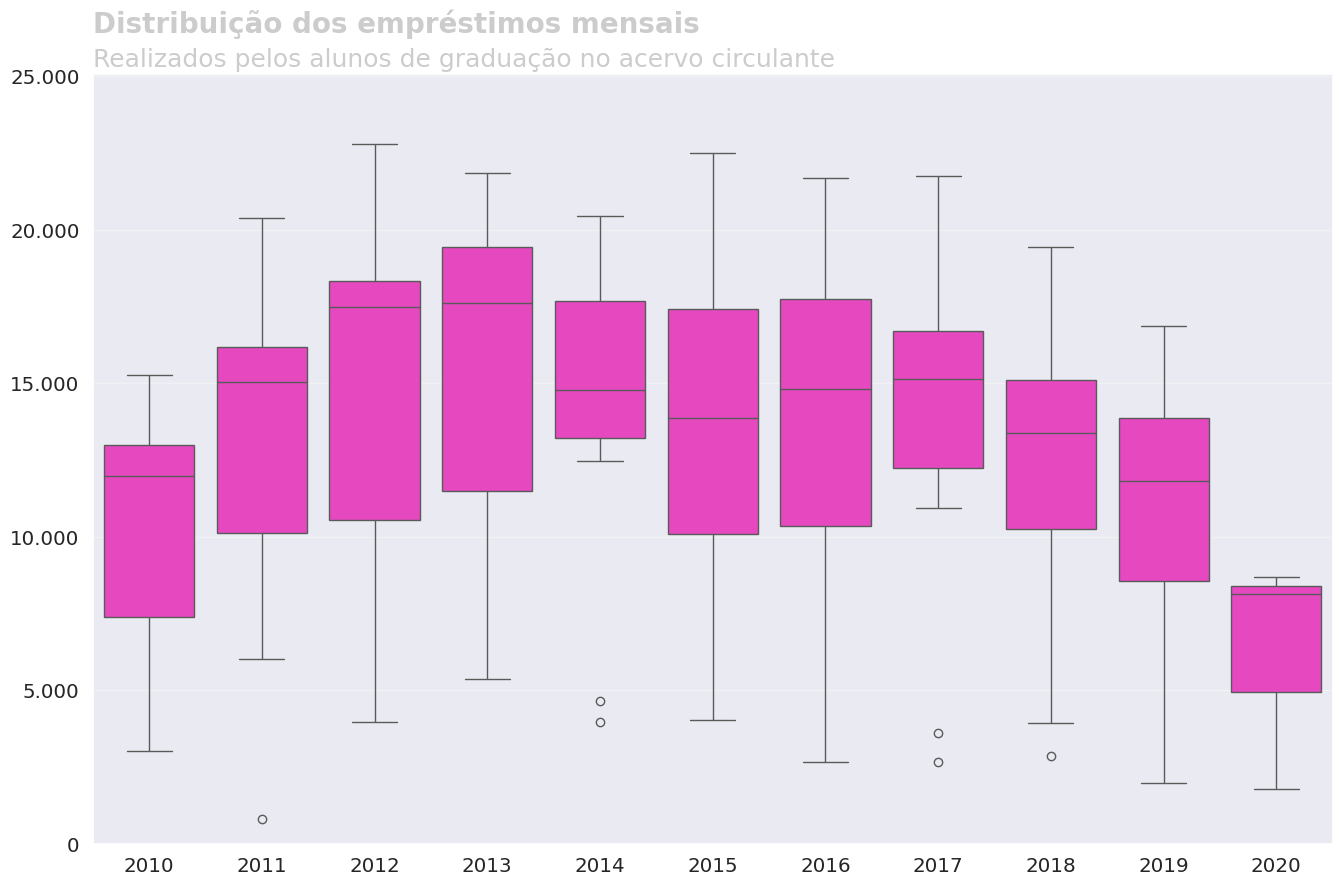

In [101]:
gera_box_plot(alunos_graduacao_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'Realizados pelos alunos de graduação no acervo circulante')

É importante ressaltar que esse recorte, reflete grande parte da estrutura geral do conjunto de dados, pois são os tipos de usuários com maior frequência (alunos de graduação) e da coleção mais utilizada por eles (acervo circulante).

Com o boxplot é possível observar a oscilação da quantidade de empréstimos realizados mensalmente durante cada ano.

Além da análise geral realizada (declínio a partir de 2013, forte baixa em 2019), chama atenção os anos de 2014 e 2017. Que se excluíssemos os outliers (possivelmente meses de janeiro e dezembro) teríamos anos com uma quantidade constante de empréstimos mensais.

Mas se diferenciam principalmente porque em 2014 houve um declínio e em 2017 houve um aumento, em relação aos anos anteriores. Seria interessante entender com a direção das bibliotecas o que ocorreu nessas datas para que pudéssemos ter um contexto melhor da realidade do negócio.

##Alunos de pós graduação

In [102]:

alunos_pos_graduacao = emprestimos_completo.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
alunos_pos_graduacao.colecao.value_counts()

,count
colecao,
Acervo Circulante,299207
Dissertações,934
Obras de Referência,700
Multimeios,559
Teses,367
Monografias,278
Publicações de Autores do RN,204
Publicações da UFRN,121
Folhetos,60


##Criando tabela com a quantidade mensal por ano

In [103]:
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao.query('colecao == "Acervo Circulante"')
alunos_pos_graduacao_acervo_circulante = pd.DataFrame(alunos_pos_graduacao_acervo_circulante)
alunos_pos_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_pos_graduacao_acervo_circulante['data_emprestimo'])
alunos_pos_graduacao_acervo_circulante['ano'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.year
alunos_pos_graduacao_acervo_circulante['mes'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.month
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.loc[:,['ano','mes']]
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
alunos_pos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2015,3,3927
1,2017,8,3837
2,2017,3,3722
3,2016,3,3711
4,2016,8,3662
...,...,...,...
119,2020,1,1143
120,2010,1,1106
121,2019,12,1069
122,2011,1,465


##Distribuição dos empréstimos mensais realizados pelos alunos de pós graduação na coleção do acervo circulante

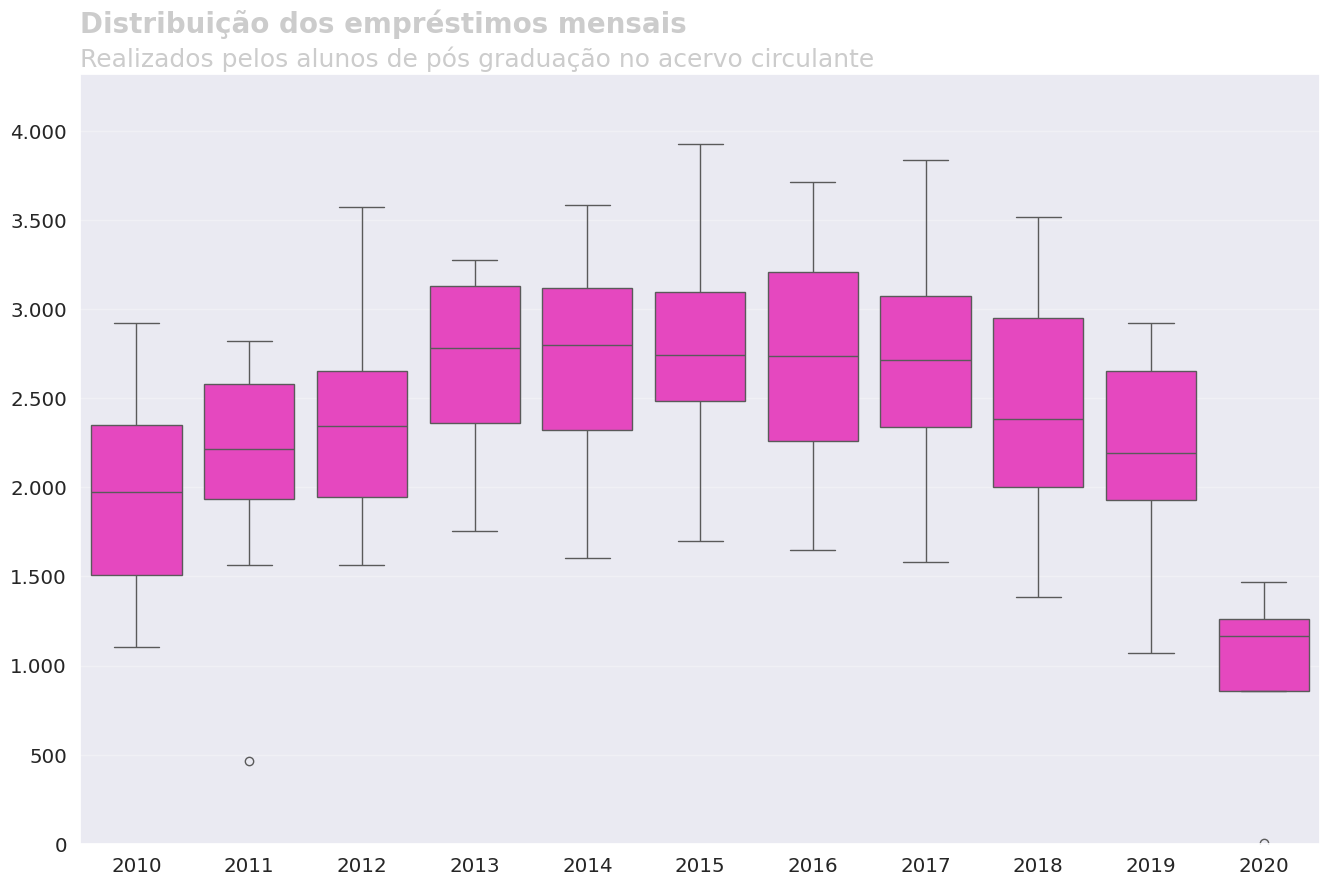

In [104]:
gera_box_plot(alunos_pos_graduacao_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'Realizados pelos alunos de pós graduação no acervo circulante')

Já os alunos de pós graduação tiveram um aspecto diferente em relação ao declínio a partir de 2013:

* A linha mediana foi diminuindo devagar até 2018. Entretanto valores máximos foram superiores, apenas caindo de fato em 2019.

Nos dois gráficos podemos observar um grande aumento entre 2010 e 2013, o que nos leva a pensar em quais procedimentos estavam sendo realizados neste período para que houvesse esse crescimento.

Nos dois recortes visualizamos que a partir de 2018 tivemos um forte declínio e é um alerta para que a direção possa entender o que está ocorrendo.